<a href="https://www.kaggle.com/code/laxmivatsalyadaita/gpa-linear-regression?scriptVersionId=139587032" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gpa-and-iq/gpa_iq.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('/kaggle/input/gpa-and-iq/gpa_iq.csv')

In [4]:
data

,obs,gpa,iq,gender,concept
0,1,7.940,111,2,67
1,2,8.292,107,2,43
2,3,4.643,100,2,52
3,4,7.470,107,2,66
4,5,8.882,114,1,58
...,...,...,...,...,...
73,85,9.000,112,1,60
74,86,9.500,112,1,70
75,87,6.057,114,2,51
76,88,6.057,93,1,21


In [5]:
data.describe()

,obs,gpa,iq,gender,concept
count,78.000000,78.000000,78.000000,78.000000,78.000000
mean,42.974359,7.446538,108.923077,1.602564,56.961538
std,25.889864,2.099557,13.170973,0.492535,12.412229
min,1.000000,0.530000,72.000000,1.000000,20.000000
25%,20.250000,6.278000,103.000000,1.000000,51.000000
50%,42.000000,7.829000,110.000000,2.000000,59.500000
75%,62.750000,8.983000,117.500000,2.000000,66.000000
max,89.000000,10.760000,136.000000,2.000000,80.000000


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

obs        0
gpa        0
iq         0
gender     0
concept    0
dtype: int64

In [8]:
data = data.drop(['obs'],axis=1)
data

,gpa,iq,gender,concept
0,7.940,111,2,67
1,8.292,107,2,43
2,4.643,100,2,52
3,7.470,107,2,66
4,8.882,114,1,58
...,...,...,...,...
73,9.000,112,1,60
74,9.500,112,1,70
75,6.057,114,2,51
76,6.057,93,1,21


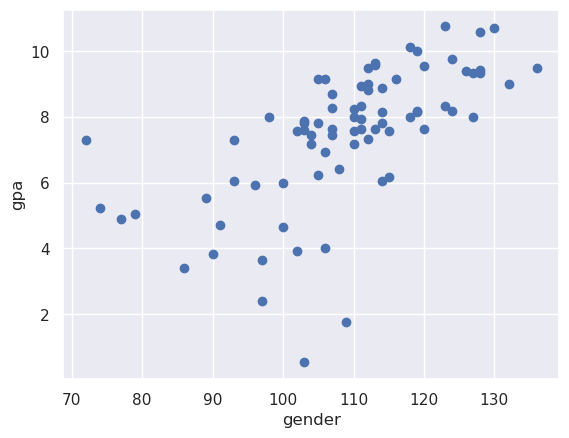

In [9]:
plt.scatter(data['iq'],data['gpa'] )
plt.xlabel('gender')
plt.ylabel('gpa')
plt.show()

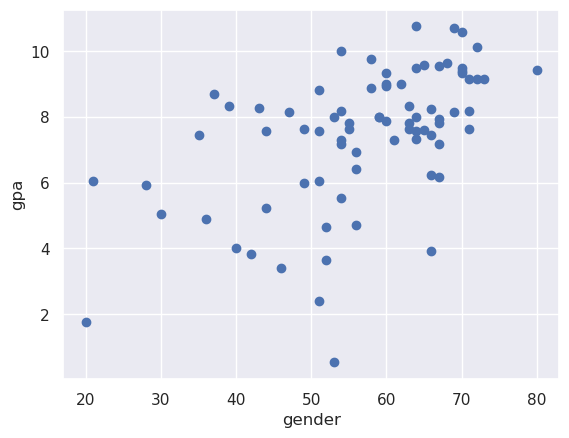

In [10]:
plt.scatter(data['concept'],data['gpa'] )
plt.xlabel('gender')
plt.ylabel('gpa')
plt.show()

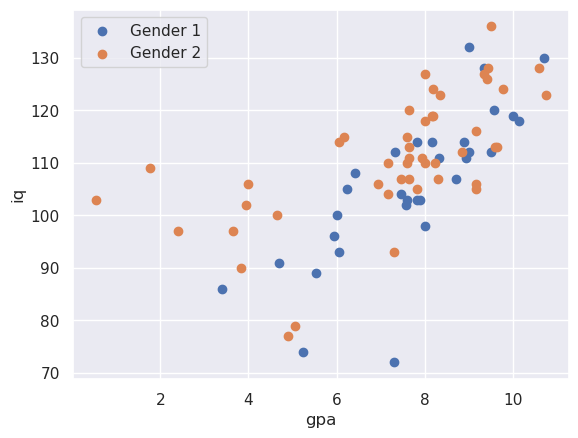

In [11]:
df1=data[data["gender"]==1]
df2=data[data["gender"]==2]
plt.scatter(df1["gpa"],df1["iq"],label="Gender 1")
plt.scatter(df2["gpa"],df2['iq'],label="Gender 2")
plt.xlabel("gpa")
plt.ylabel("iq")
plt.legend()

<Axes: >

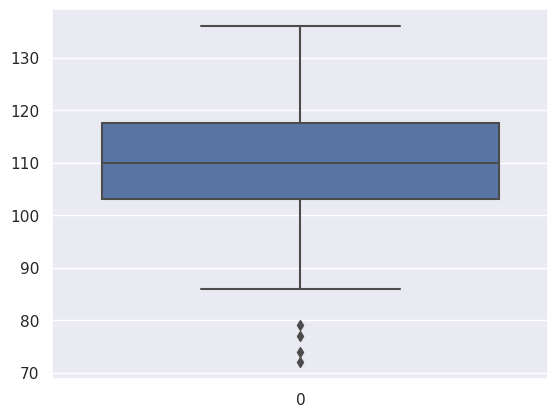

In [12]:
sns.boxplot(data['iq'])

<Axes: >

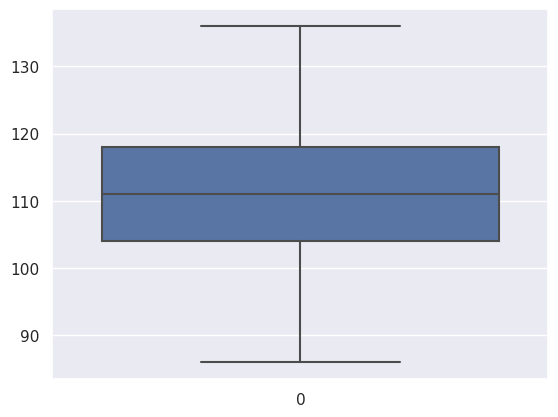

In [13]:
data = data[data['iq']>=80]
sns.boxplot(data['iq'])

<Axes: >

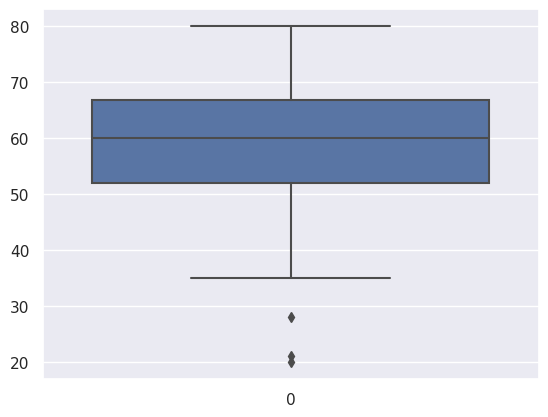

In [14]:
sns.boxplot(data['concept'])

<Axes: >

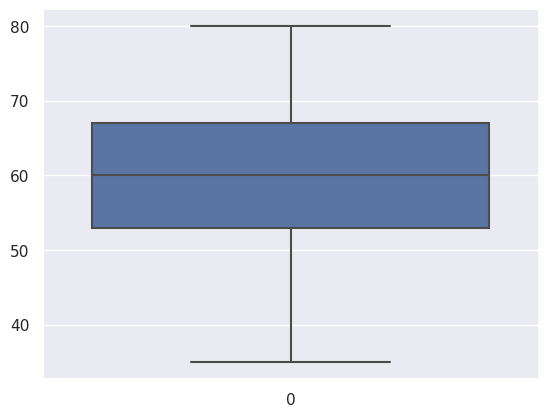

In [15]:
data = data[data['concept']>=30]
sns.boxplot(data['concept'])

In [16]:
data.shape

(71, 4)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['iq','gender','concept']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [18]:
vif

,VIF,features
0,52.298834,iq
1,12.131139,gender
2,43.646388,concept


VIF>10 implying very high correlation.

In [19]:
y = data['gpa']
x1 = data[['gender','iq', 'concept']]

In [20]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     27.48
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           1.06e-11
Time:                        06:15:51   Log-Likelihood:                -121.25
No. Observations:                  71   AIC:                             250.5
Df Residuals:                      67   BIC:                             259.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7178      1.770     -3.796      0.000     -10.250      -3.185
gender        -0.8905      0.340     -2.619      0.011      -1.569      -0.212
iq             0.1196      0.017      7.139      0.000       0.086       0.153
concept        0.0426      0.018      2.326      0.023       0.006       0.079
==============================================================================
Omnibus:                       20.447   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.823
Skew:                          -1.057   Prob(JB):                     4.52e-08
Kurtosis:                       5.638   Cond. No.                     1.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Durbin-Watson test is between 0 and 4 implying there is no auto-correlation.

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
scaler.fit(x1)

StandardScaler()

In [24]:
scaled_x1 = scaler.transform(x1)

In [25]:
scaled_x1

array([[ 0.78334945, -0.01981909,  0.79697482],
       [ 0.78334945, -0.39506051, -1.68574017],
       [ 0.78334945, -1.05173299, -0.75472205],
       [ 0.78334945, -0.39506051,  0.69352837],
       [-1.27656948,  0.26161198, -0.1340433 ],
       [ 0.78334945,  0.35542233, -0.8581685 ],
       [ 0.78334945, -0.01981909,  1.21076066],
       [ 0.78334945, -1.33316406, -0.8581685 ],
       [-1.27656948, -1.05173299, -1.06506142],
       [ 0.78334945,  0.07399127, -0.8581685 ],
       [-1.27656948, -0.67649157, -2.51331183],
       [-1.27656948, -2.0836469 , -0.54782913],
       [ 0.78334945, -0.67649157, -0.54782913],
       [-1.27656948, -0.86411228,  0.48663545],
       [-1.27656948, -1.89602619, -0.34093621],
       [-1.27656948,  0.26161198,  1.00386774],
       [-1.27656948,  0.26161198, -0.44438267],
       [-1.27656948, -0.77030193,  0.59008191],
       [ 0.78334945, -0.48887086, -1.99607954],
       [-1.27656948, -0.58268122,  0.69352837],
       [ 0.78334945,  0.16780162, -0.444

In [26]:
new_x = sm.add_constant(scaled_x1)
new_results = sm.OLS(y,new_x).fit()

In [27]:
new_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     27.48
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           1.06e-11
Time:                        06:15:51   Log-Likelihood:                -121.25
No. Observations:                  71   AIC:                             250.5
Df Residuals:                      67   BIC:                             259.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6704      0.163     47.036      0.000       7.345       7.996
x1            -0.4323      0.165     -2.619      0.011      -0.762      -0.103
x2             1.2752      0.179      7.139      0.000       0.919       1.632
x3             0.4119      0.177      2.326      0.023       0.058       0.765
==============================================================================
Omnibus:                       20.447   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.823
Skew:                          -1.057   Prob(JB):                     4.52e-08
Kurtosis:                       5.638   Cond. No.                         1.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
scaled_x1_df = pd.DataFrame(scaled_x1,columns = ['gender', 'iq', 'concept'])

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = scaled_x1_df[['iq','gender','concept']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [30]:
vif

,VIF,features
0,1.199848,iq
1,1.024943,gender
2,1.179003,concept


Since variance inflation factor is almost equal to 1, we can say the features have very less correlation.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x1_df, y, test_size = 0.2, random_state=20)

In [33]:
reg = LinearRegression()

In [34]:
reg.fit(x_train,y_train)

LinearRegression()

In [35]:
preds = reg.predict(x_test)

In [36]:
reg.score(x_train,y_train) #r-squared

0.49834631153330833

In [37]:
reg.coef_

array([-0.39858122,  1.23850073,  0.43379787])

In [38]:
reg.intercept_

7.668425630242971

Adjusted r-squared:

In [39]:
r2 = reg.score(x_train,y_train)
n = x_train.shape[0]
p = x_train.shape[1]

adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.46940475258330683

Adj r-squared < r-squared, implying one or more predictors have little or no explanatory power.

In [40]:
from sklearn.feature_selection import f_regression

In [41]:
f_regression(x_train, y_train)

(array([ 0.30508703, 39.43625213, 11.6005493 ]),
 array([5.82989837e-01, 6.04923782e-08, 1.25122314e-03]))

In [42]:
p_values = f_regression(x_train,y_train)[1]
p_values.round(3)

array([0.583, 0.   , 0.001])

'gender' has p-value > 0.05 implying it is insignificant for analysis.

In [43]:
scaled_x1_df = scaled_x1_df.drop('gender',axis=1)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x1_df,y,test_size=0.2,random_state=20)

In [45]:
new_reg = LinearRegression()

In [46]:
new_reg.fit(x_train, y_train)

LinearRegression()

In [47]:
new_reg.score(x_train,y_train)

0.4621206552373457

In [48]:
r2 = new_reg.score(x_train,y_train)
n = x_train.shape[0]
p = x_train.shape[1]

adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.4418233214727172